-47.599999999999994
47.599999999999994 976.4
Plotting Circle
Plotting Circle


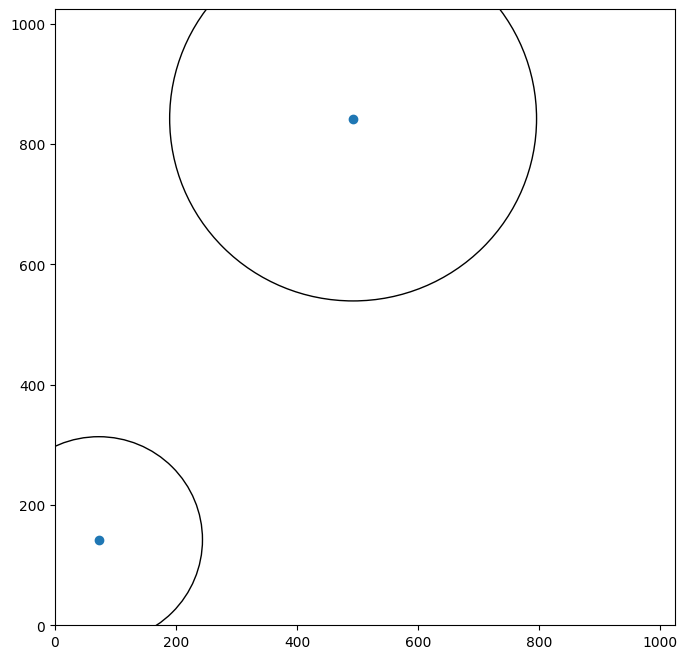

guidelines=[Guideline(type='circle', x_center=492.607429149828, y_center=842.166102393579, radius=302.99244953065636, variance=50.0, n_cells=5, tangent_distribution='uniform', radial_distribution='normal'), Guideline(type='circle', x_center=72.6025048263238, y_center=142.2627086909534, radius=171.22348627236596, variance=50.0, n_cells=5, tangent_distribution='uniform', radial_distribution='normal')] cells=[]


In [13]:
import matplotlib.pyplot as plt
from multiomicscellsim import Simulator

sim = Simulator()
sim.generate_default_json()
tissue = sim.sample()

sim.plot_debug(tissue)
print(tissue)